## Dataset Used:
Google Play Store Apps a dataset by Kaggle

In [4]:
#Importing Import Libraries
import pandas
import nltk
import matplotlib

In [6]:
#Loading the Dataset
dataset = pandas.read_csv('../googleplaystore.csv')
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
dataset[['App', 'Genres']].head()

,App,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art & Design
1,Coloring book moana,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art & Design
3,Sketch - Draw & Paint,Art & Design
4,Pixel Draw - Number Art Coloring Book,Art & Design;Creativity


In [8]:
#Grouping by a specfic Category
genres = dataset.groupby("Genres")

genres.describe().head()

Rating                                          \
                              count      mean       std  min  25%  50%  75%   
Genres                                                                        
Action                        358.0  4.285475  0.291353  3.1  4.2  4.3  4.5   
Action;Action & Adventure      17.0  4.311765  0.172780  3.9  4.3  4.3  4.4   
Adventure                      73.0  4.180822  0.312542  3.4  4.0  4.3  4.4   
Adventure;Action & Adventure   13.0  4.423077  0.148064  4.1  4.5  4.5  4.5   
Adventure;Brain Games           1.0  4.600000       NaN  4.6  4.6  4.6  4.6   

                                   
                              max  
Genres                             
Action                        5.0  
Action;Action & Adventure     4.6  
Adventure                     4.7  
Adventure;Action & Adventure  4.5  
Adventure;Brain Games         4.6

In [11]:
#Word count 
dataset['Count'] = dataset['App'].apply(lambda x: len(str(x).split(" ")))
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Count
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,9
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,5
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,7


In [12]:
dataset.Count.describe()

count    10841.000000
mean         3.928051
std          2.146736
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         26.000000
Name: Count, dtype: float64

In [13]:
#Highest Frequency
occurance = pandas.Series(' '.join(dataset['App']).split()).value_counts()[:30]
occurance

-         1627
&          929
for        485
Free       380
and        269
App        260
Mobile     196
Live       165
The        160
Video      159
Pro        156
of         148
Photo      145
–          142
by         141
News       136
2018       133
My         130
Camera     120
Dating     117
Chat       115
Editor     107
3D         105
Learn      105
the        105
TV         104
Game       104
Theme      102
2           98
Games       98
dtype: int64

In [14]:
#Rearly Occuring Elements
non = pandas.Series(' '.join(dataset['App']).split()).value_counts()[-30:]
non

slideshow     1
FreePrints    1
Chegg         1
rental..)     1
MHD           1
musical.ly    1
Fatal         1
DO            1
Launch        1
TMJ4.com      1
Unico         1
más           1
QRZ           1
VenkatRama    1
Whitening     1
Glowing       1
－             1
Rose          1
Johns         1
Variant       1
APagri        1
Bear-         1
Dormi         1
k             1
Summits       1
James         1
BILASPUR      1
Caviar        1
Patients      1
Taximeter     1
dtype: int64

In [29]:
#Processing the text
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

# List of stop words
stop_words = set(stopwords.words('english'))

new_words = ["free", "live", "app","pro","mobile","c","b","tv","android","e","go","hd","online","launcher"]
stop_words = stop_words.union(new_words)

In [30]:
corpus = []

# Cleaning dataset
n = len(dataset['App'])
for i in range(0, n):
    # Remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', dataset['App'][i])
    
    # Convert everything to lowercase
    text = text.lower()
    
    # remove tags
    text = re.sub('&lt;/?.*>&gt;', ' &lt;&gt; ', text)
    
    # remove special characters and digits
    text = re.sub('(\\d|\\W)+', ' ', text)
    
    # Convert string to list
    text = text.split()
    
    # Stemming
    ps = PorterStemmer()
    
    # Lemmatization
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in stop_words]
    text = ' '.join(text)
    corpus.append(text)
  
# Print frequency of the words in cleaned dataset
freq2 = pandas.Series(' '.join(corpus).split()).value_counts()[:20]
freq2

game          250
video         245
news          203
photo         196
chat          195
theme         157
camera        157
wallpaper     151
dating        137
editor        133
learn         111
calculator    108
simulator     107
manager       106
call          102
tracker        98
car            97
google         94
kid            88
book           82
dtype: int64

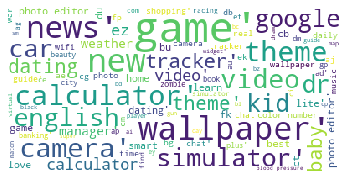

In [32]:
#WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', stopwords=stop_words,
                     max_words=100, max_font_size=50, 
                      random_state=42).generate(str(corpus))

fig = plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()